In [76]:
#
# решение с помощью локального поиска
# просто реализовала рассказаный нам когда-то алгоритм

from scipy import misc
from PIL import Image                                                                                
import numpy as np
import matplotlib.pyplot as plt
  
def dist(x, y):
    return sum((x - y) ** 2)
 
def get_neighbours(i, j, max_i, max_j):
    result = []
    if i > 0:
        result.append((i - 1, j))
    if j > 0:
        result.append((i, j - 1))
    if (i + 1) < max_i:
        result.append((i + 1, j))
    if (j + 1) < max_j:
        result.append((i, j  + 1))
 
    return result
 
def flip(i, j, A, B):
    if (i, j) in A:
        A.remove((i, j))
        B.add((i, j))
    else:
        B.remove((i, j))
        A.add((i, j))
 
def cut(image):
    dim_x, dim_y, colors = image.shape
    A = set()
    B = {(i, j) for i in range(dim_x) for j in range(dim_y)}
     
    # Your implementation here
    # start
    
    for i in range(dim_x):
        for j in range(dim_y):
            if dist(image[i][j], S) < dist(image[i][j], T):
                flip(i, j, A, B)
    is_changed = True
    count = 1
    while is_changed:
        is_changed = False 
        for i in range(dim_x):
            for j in range(dim_y):
                neighbours = get_neighbours(i, j, dim_x, dim_y)
                fine = 0
                for pixel in neighbours:
                    if (i, j) in B and pixel not in B: 
                        fine += dist(image[i][j], T)
                    elif (i, j) in A and pixel not in A:
                        fine += dist(image[i][j], S)
                fine = fine * beta;
                if ((i, j) in A) and (fine > alpha * dist(image[i][j], T)):
                    flip(i, j, A, B) 
                    is_changed = True 
                elif ((i, j) in B) and (fine > alpha * dist(image[i][j], S)):
                    flip(i, j, A, B) 
                    is_changed = True 
        count += 1
        # finish
    return A, B
 
 
def main():
    image = misc.imread(IMAGE)
    dim_x, dim_y, colors = image.shape
    print("Loaded image of shape {x}, {y}".format(x=dim_x, y=dim_y))
    plt.imshow(image)
    plt.show()
    A, B = cut(image)
    for i in range(dim_x):
        for j in range(dim_y):
            if (i, j) in A:
                image[i, j, 0] = min(255, image[i, j, 0] + 100)
                image[i, j, 1] = image[i, j, 1] / 3
                image[i, j, 2] = image[i, j, 2] / 3
            elif (i,j) in B:
                image[i, j, 0] = image[i, j, 0] / 3
                image[i, j, 1] = min(255, image[i, j, 1] + 100)
                image[i, j, 2] = image[i, j, 2] / 3                                                         
    plt.imshow(image)
    plt.show() 
    misc.imsave('out.png', image)

In [77]:
# Samples

Loaded image of shape 160, 240


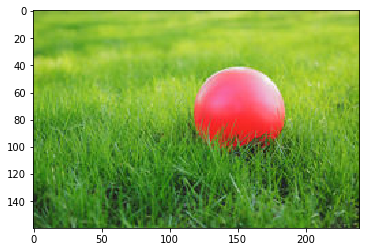

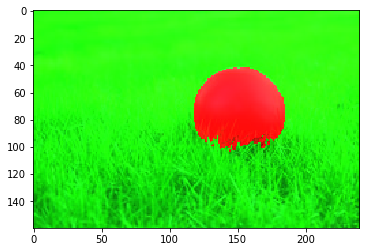

In [78]:
# image ball:

IMAGE = '/Users/azaliyazakieva/Documents/HSE 2 course/Algorithms - 2/Labs/images/ball.jpg'
alpha = 2
beta = 1
T = [0, 255, 0]
S = [255, 0, 0]                                                            
if __name__ == '__main__':
    main()

Loaded image of shape 350, 500


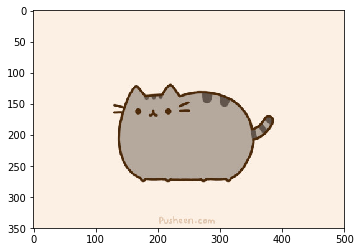

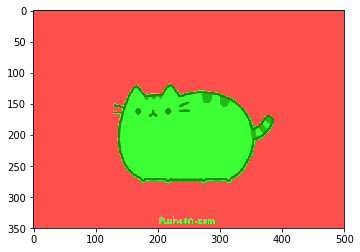

In [79]:
# image cat (заменила на свою картинку):

IMAGE = '/Users/azaliyazakieva/Documents/HSE 2 course/Algorithms - 2/Labs/images/cat.jpg'
alpha = 2
beta = 1
T = [255, 255, 180]
S = [255, 255, 255] 
if __name__ == '__main__':
    main()

Loaded image of shape 1080, 1920


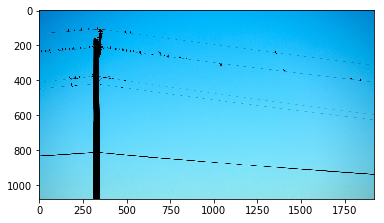

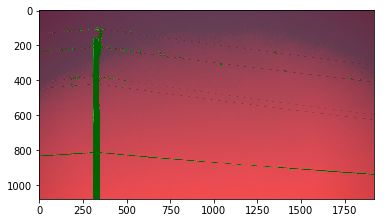

In [80]:
# image sky:

IMAGE = '/Users/azaliyazakieva/Documents/HSE 2 course/Algorithms - 2/Labs/images/sky.jpg'
alpha = 1
beta = 0.5
T = [0, 0, 0]
S = [0, 180, 255]                                                         
if __name__ == '__main__':
    main() 

Loaded image of shape 367, 550


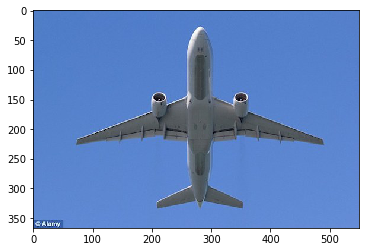

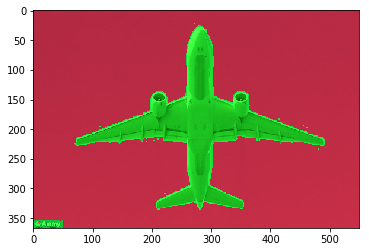

In [81]:
# image plane:

IMAGE = '/Users/azaliyazakieva/Documents/HSE 2 course/Algorithms - 2/Labs/images/plane.jpg'
alpha = 2
beta = 1
T = [60, 90, 120]
S = [0, 120, 180]                                                          
if __name__ == '__main__':
    main()   